In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [19]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
# Chẳng hạn như bạn có 1 biến ngẫu nhiên n chiều X(x1,x2,...,xn) 
# thì để thể hiện phân phối của tâp dữ liệu thì bạn cần 1 ma trận vuông n*n. 
# trong đó đường chéo chính là phương sai của của n biến 1 chiều xi và các 
# số hạng còn lại của ma trận vuông là hiệp phương sai giữa các xi vs nhau. 
# Ma trânj vuông trên gọi là ma trận hiệp phương sai. Hàm bạn hỏi là hàm tạo ra
# bộ dữ liệu có trung bình là mean, ma trận hiệp phương sai cov và có N điểm dữ 
# liệu và theo phân phối chuẩn.
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
original_label

array([0, 0, 0, ..., 2, 2, 2])

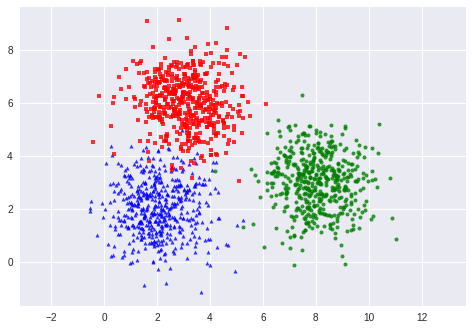

In [22]:
plt.style.use("seaborn")
def kmean_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]

  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

  plt.axis("equal")
  plt.plot()
  plt.show()
  
kmean_display(X, original_label)

Centers found by our algorithm: 
[[2.03401712 2.0300054 ]
 [3.10262035 6.05155797]
 [8.0398762  3.00181186]]


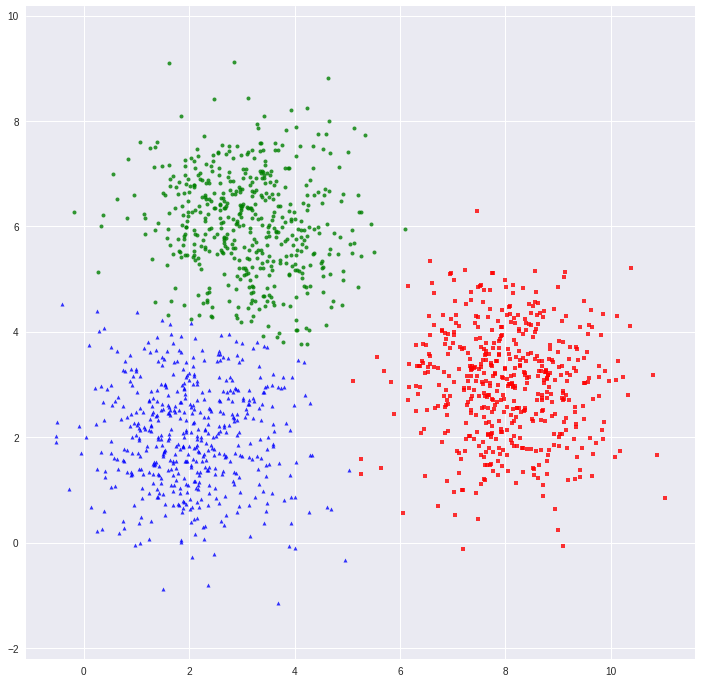

In [32]:
def kmeans_init_centers(X, K):
  # randomly pick k rows of X as initial centers
  return X[np.random.choice(X.shape[0], K, replace=False)]

def kmeans_assign_labels(X, centers):
  # calculate pairwise distances btw data and centers
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    # collect all points assigned to the k-th cluster
    Xk = X[labels == k, : ]
    # take average
    centers[k, :] = np.mean(Xk, axis = 0)
  return centers

def has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
  centers = [kmeans_init_centers(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1
  return centers, labels, it

plt.figure(figsize = (12,12))
centers, labels, it = kmeans(X, K)
print("Centers found by our algorithm: ")
print(centers[-1])

kmean_display(X, labels[-1])

Centers found by scikit-learn:
[[8.0398762  3.00181186]
 [3.10262035 6.05155797]
 [2.03401712 2.0300054 ]]


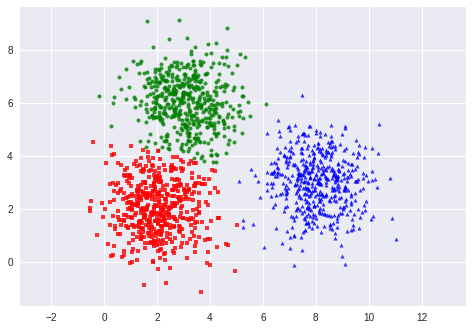

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print("Centers found by scikit-learn:")
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmean_display(X, pred_label)